In [25]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# My imports
import datahandler as d

In [27]:
dh = d.DataHandler("/home/zr/code/imc-prosperity-3/round_4/data")
dh.load_csv_files("observations_round_", ",")
dh.set_index()
df = dh.get_combined_dataframes()
print(df.head())

# products = df["product"].unique()
# data = {product: df[df['product'] == product] for product in products}

   timestamp  bidPrice  askPrice  transportFees  exportTariff  importTariff  \
0          0     627.0     628.5            1.0           9.0          -3.0   
1        100     630.0     631.5            1.0           9.0          -3.0   
2        200     630.0     631.5            1.0           9.0          -3.0   
3        300     632.0     633.5            1.0           9.0          -3.0   
4        400     630.5     632.0            1.0           9.0          -3.0   

   sugarPrice  sunlightIndex    index  
0  200.000000          60.00  2000000  
1  200.098445          60.00  2000100  
2  200.103915          60.00  2000200  
3  200.352462          60.01  2000300  
4  200.201545          60.01  2000400  


In [28]:
df["midPrice"] = (df["bidPrice"] + df["askPrice"]) / 2
df

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,index,midPrice
0,0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00,2000000,627.75
1,100,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00,2000100,630.75
2,200,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00,2000200,630.75
3,300,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01,2000300,632.75
4,400,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01,2000400,631.25
...,...,...,...,...,...,...,...,...,...,...
29995,999500,797.5,799.0,1.7,9.5,-5.5,212.124918,54.95,4999500,798.25
29996,999600,801.5,803.0,1.7,9.5,-5.5,212.147650,54.96,4999600,802.25
29997,999700,804.0,805.5,1.7,9.5,-5.5,212.202086,54.97,4999700,804.75
29998,999800,798.5,800.0,1.7,9.5,-5.5,212.112734,54.98,4999800,799.25


In [29]:
df = df.set_index(["index"])

In [30]:
len(df.columns), df.columns

(9,
 Index(['timestamp', 'bidPrice', 'askPrice', 'transportFees', 'exportTariff',
        'importTariff', 'sugarPrice', 'sunlightIndex', 'midPrice'],
       dtype='object'))

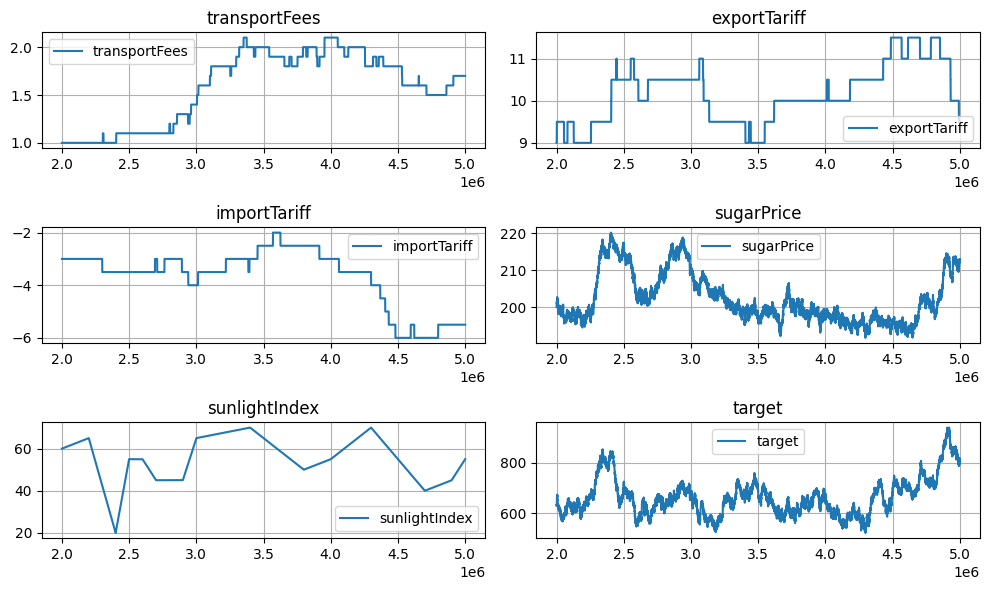

In [66]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(3, 2, figsize=(10, 6))
ax1 = ax1.flatten()  # Flatten the 2D array of axes to a 1D array

columns = ['transportFees', 'exportTariff', 'importTariff',
           'sugarPrice', 'sunlightIndex', 'target']

for ax, column in zip(ax1, columns):
    ax.plot(rdf[column], label=column)
    ax.set_title(column)
    ax.legend()
    ax.grid(True)  # Add a grid to each subplot

plt.tight_layout()
plt.show()


Eyeballing looks like sugar price fluctuations are followedby similar movement in midprice. Hard to say much else but let's try and create a  model

In [32]:
# data for regression
rdf = df[columns]

rdf["target"] = rdf["midPrice"].shift(-1)
rdf = rdf.iloc[:-1]
rdf

/tmp/ipykernel_222037/3069636944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf["target"] = rdf["midPrice"].shift(-1)


,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,midPrice,target
index,,,,,,,
2000000,1.0,9.0,-3.0,200.000000,60.00,627.75,630.75
2000100,1.0,9.0,-3.0,200.098445,60.00,630.75,630.75
2000200,1.0,9.0,-3.0,200.103915,60.00,630.75,632.75
2000300,1.0,9.0,-3.0,200.352462,60.01,632.75,631.25
2000400,1.0,9.0,-3.0,200.201545,60.01,631.25,634.75
...,...,...,...,...,...,...,...
4999400,1.7,9.5,-5.5,211.996634,54.94,796.75,798.25
4999500,1.7,9.5,-5.5,212.124918,54.95,798.25,802.25
4999600,1.7,9.5,-5.5,212.147650,54.96,802.25,804.75


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features and target
X = rdf[['transportFees', 'exportTariff', 'importTariff', 'sugarPrice', 'sunlightIndex']]
y = rdf['target']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optional: Show model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel Coefficients:")
print(coefficients)


Mean Squared Error: 9297.891618864523
R^2 Score: -0.5295705547285903

Model Coefficients:
transportFees    43.622173
exportTariff    -58.630992
importTariff    -24.583612
sugarPrice        4.850068
sunlightIndex    -2.658519
dtype: float64


In [56]:
print("Target variance:", y.var())

Target variance: 5557.1186107856765


Not bad, MSE 1881 < 5556.9, y.var()

Need to improve R^2

Let's create a corr matrix to see if the variables are linear

In [57]:
rdf.corr() 

,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,midPrice,target,transportFees_bin,exportTariff_bin,importTariff_bin
transportFees,1.000000,0.004088,0.035273,-0.502112,0.475931,-0.163134,-0.163136,1.000000,0.004088,0.035273
exportTariff,0.004088,1.000000,-0.736308,0.055230,-0.398178,0.203644,0.203630,0.004088,1.000000,-0.736308
importTariff,0.035273,-0.736308,1.000000,0.029607,0.330990,-0.479370,-0.479438,0.035273,-0.736308,1.000000
sugarPrice,-0.502112,0.055230,0.029607,1.000000,-0.476954,0.455930,0.455484,-0.502112,0.055230,0.029607
sunlightIndex,0.475931,-0.398178,0.330990,-0.476954,1.000000,-0.552172,-0.552184,0.475931,-0.398178,0.330990
midPrice,-0.163134,0.203644,-0.479370,0.455930,-0.552172,1.000000,0.999468,-0.163134,0.203644,-0.479370
target,-0.163136,0.203630,-0.479438,0.455484,-0.552184,0.999468,1.000000,-0.163136,0.203630,-0.479438
transportFees_bin,1.000000,0.004088,0.035273,-0.502112,0.475931,-0.163134,-0.163136,1.000000,0.004088,0.035273
exportTariff_bin,0.004088,1.000000,-0.736308,0.055230,-0.398178,0.203644,0.203630,0.004088,1.000000,-0.736308
importTariff_bin,0.035273,-0.736308,1.000000,0.029607,0.330990,-0.479370,-0.479438,0.035273,-0.736308,1.000000


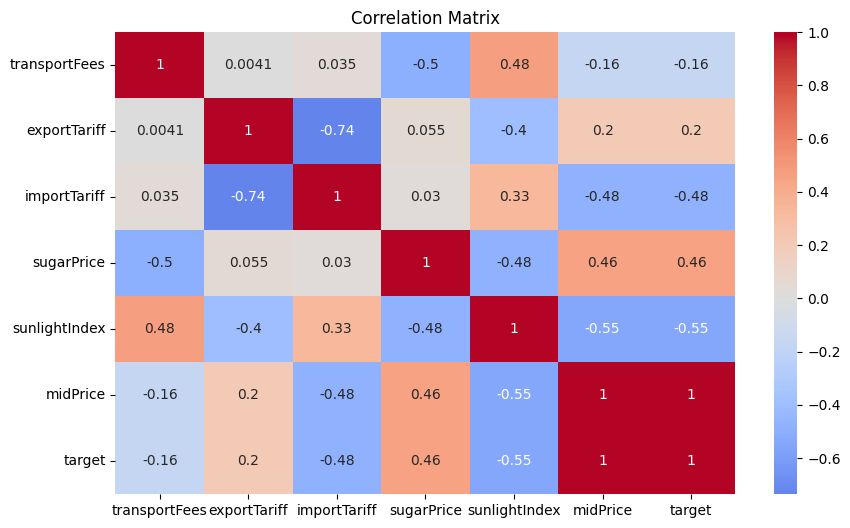

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(rdf.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

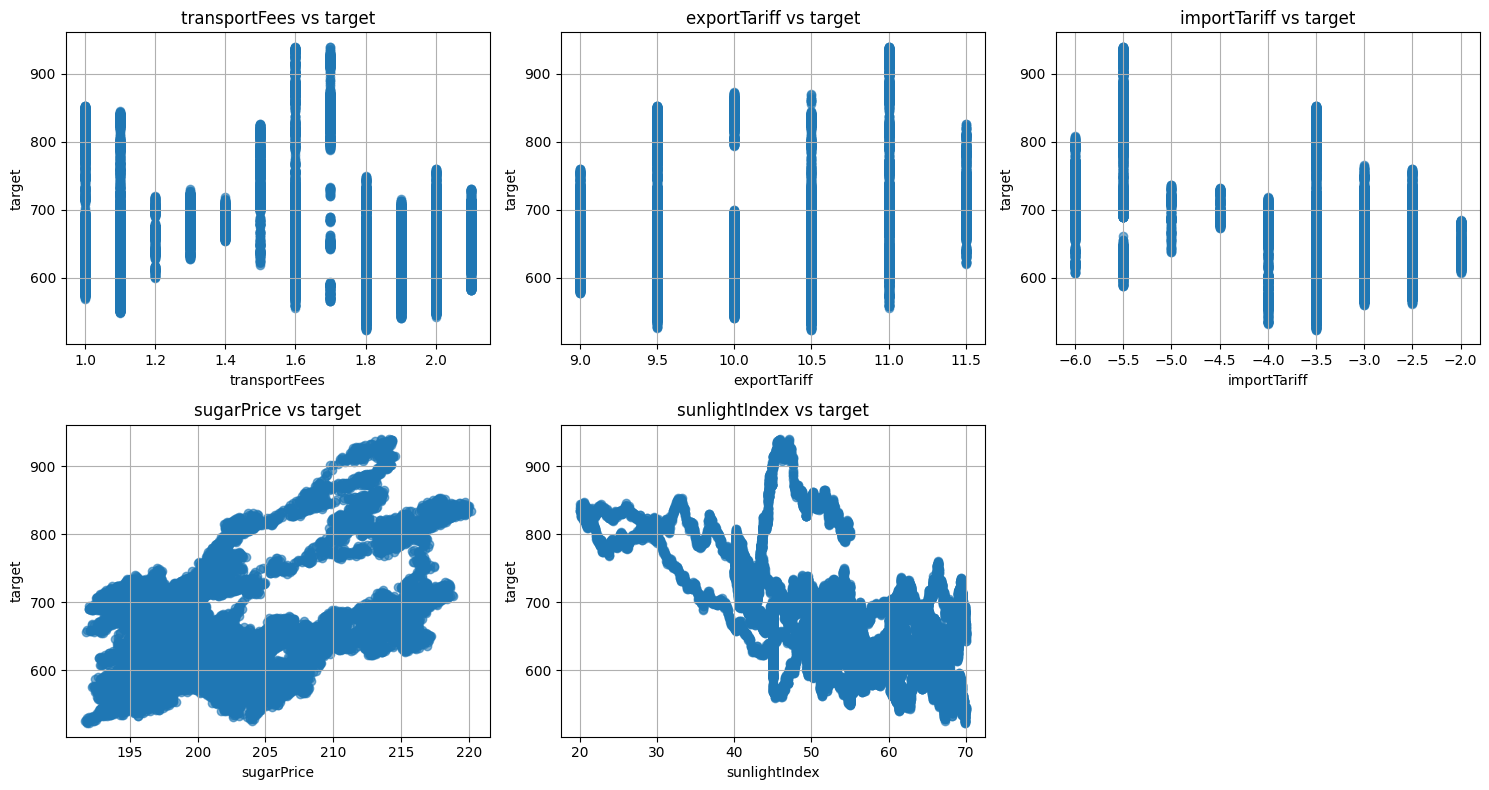

In [38]:
import matplotlib.pyplot as plt

features = ['transportFees', 'exportTariff', 'importTariff', 'sugarPrice', 'sunlightIndex']
target = 'target'

# Create a grid of scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(rdf[feature], rdf[target], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f"{feature} vs {target}")
    axes[i].grid(True)

# Hide any unused subplot (since we have 5 features and 6 axes)
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



it looks like importFees, exportFees, importTariff all have set prices essentially.

Let's set these variables as "ordinal" features, basically making them categorical


In [40]:
rdf['transportFees_bin'] = pd.cut(rdf['transportFees'], bins=12, labels=False)
rdf['exportTariff_bin'] = pd.cut(rdf['exportTariff'], bins=6, labels=False)
rdf['importTariff_bin'] = pd.cut(rdf['importTariff'], bins=9, labels=False)


In [56]:
rdf

,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,midPrice,target,importTariff_bin,exportTariff_bin,transportFees_bin
index,,,,,,,,,,
2000000,1.0,9.0,-3.0,200.000000,60.00,627.75,630.75,6,0,0
2000100,1.0,9.0,-3.0,200.098445,60.00,630.75,630.75,6,0,0
2000200,1.0,9.0,-3.0,200.103915,60.00,630.75,632.75,6,0,0
2000300,1.0,9.0,-3.0,200.352462,60.01,632.75,631.25,6,0,0
2000400,1.0,9.0,-3.0,200.201545,60.01,631.25,634.75,6,0,0
...,...,...,...,...,...,...,...,...,...,...
4999500,1.7,9.5,-5.5,212.124918,54.95,798.25,802.25,1,1,7
4999600,1.7,9.5,-5.5,212.147650,54.96,802.25,804.75,1,1,7
4999700,1.7,9.5,-5.5,212.202086,54.97,804.75,799.25,1,1,7


let's run the linear regrssion again and see what's what

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features and target
X = rdf[['transportFees_bin', 'exportTariff_bin', 'importTariff_bin', 'sugarPrice', 'sunlightIndex', "midPrice"]]
y = rdf['target']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optional: Show model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error: 5.895727513548808
R^2 Score: 0.9990301100966663

Model Coefficients:
transportFees_bin    0.003404
exportTariff_bin    -0.056415
importTariff_bin    -0.047065
sugarPrice          -0.002613
sunlightIndex       -0.006652
midPrice             0.998630
dtype: float64


In [71]:
print(model.coef_)
print(model.feature_names_in_)

[ 0.00340426 -0.0564155  -0.04706516 -0.0026126  -0.00665207  0.99862953]
['transportFees_bin' 'exportTariff_bin' 'importTariff_bin' 'sugarPrice'
 'sunlightIndex' 'midPrice']


Okay so to trade this i just need to use this model to predict the price i think it's going to be and then use a delta hedge 

In [ ]:
coefficents = np.array([0.00340426, -0.0564155,  -0.04706516,-0.0026126 ,-0.00665207 ,0.99862953])
features = ['transportFees_bin' 'exportTariff_bin' 'importTariff_bin' 'sugarPrice'
 'sunlightIndex' 'midPrice']

data = np.array([1,2,3,4,5,6])

coefficents @ data

TypeError: unsupported operand type(s) for @: 'list' and 'list'